# Uber Data Analysis
## Uber Pickups Numbers in New York City 
## Xiaodan Chen 
## 2021-10-14

### Importing the Essential Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
uber_df = pd.read_csv('/Users/dani/Desktop/Python_Project/Uber/uber_dataset.csv')

In [3]:
uber_df.tail(5)

,Unnamed: 0,Date.Time,Lat,Lon,Base,Time,day,month,year,dayofweek,hour,minute,second
4534322,4534323,2014-09-30 22:57:00,40.7668,-73.9845,B02764,22:57:00,30,Sep,2014,Tue,22,57,0
4534323,4534324,2014-09-30 22:57:00,40.6911,-74.1773,B02764,22:57:00,30,Sep,2014,Tue,22,57,0
4534324,4534325,2014-09-30 22:58:00,40.8519,-73.9319,B02764,22:58:00,30,Sep,2014,Tue,22,58,0
4534325,4534326,2014-09-30 22:58:00,40.7081,-74.0066,B02764,22:58:00,30,Sep,2014,Tue,22,58,0
4534326,4534327,2014-09-30 22:58:00,40.7140,-73.9496,B02764,22:58:00,30,Sep,2014,Tue,22,58,0


### Data Structure

This dataset contains more than 4.5 millions observations and 13 columns.

In [4]:
uber_df.shape

(4534327, 13)

In [5]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Date.Time   object 
 2   Lat         float64
 3   Lon         float64
 4   Base        object 
 5   Time        object 
 6   day         int64  
 7   month       object 
 8   year        int64  
 9   dayofweek   object 
 10  hour        int64  
 11  minute      int64  
 12  second      int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 449.7+ MB


### Checking any Missing Values

In [6]:
uber_df.isnull().values.any()

False

### Number of Trips in a Day

The number of trips that the passengers made in a day, showing the number of passengers fares throughout the day. 

In [6]:
hour = uber_df['hour']
hour_df = hour.value_counts()
hour_df

17    336190
18    324679
16    313400
19    294513
20    284604
21    281460
15    275466
22    241858
14    230625
13    195877
7     193094
8     190504
12    170452
23    169190
11    165703
9     159967
10    159148
6     143213
0     103836
5      83939
1      67227
4      55230
3      48287
2      45865
Name: hour, dtype: int64

The number of trips are higher in the evening around 5:00 and 6:00 PM. 

[Text(0.5, 1.0, 'Number of Trips in a Day')]

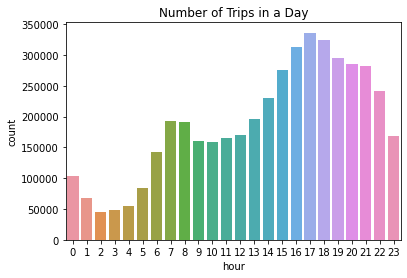

In [4]:
fig, ax = plt.subplots()
sns.countplot(data=uber_df, x = 'hour')
ax.set(title = 'Number of Trips in a Day')

### Number of Trips during Every Day of the Month

The result shows the 30th of the month had the higest trips in the year. 

In [8]:
day = uber_df['day']
day_df = day.value_counts()
day_df

30    167160
12    160606
16    158921
13    156892
23    156032
9     155135
15    153726
26    153405
19    153088
25    152667
17    152524
10    152500
18    151319
29    149086
11    148860
5     147054
22    146952
8     145984
27    145652
20    144179
24    144169
7     143503
2     143201
3     142983
28    141157
21    141112
4     140923
14    140148
6     139886
1     127430
31     78073
Name: day, dtype: int64

[Text(0.5, 1.0, 'Number of Trips During Every day of the Month')]

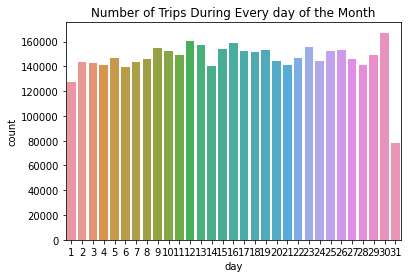

In [5]:
fig, ax = plt.subplots()
sns.countplot(data=uber_df, x = 'day')
ax.set(title = 'Number of Trips During Every day of the Month')

### Number of Trips on Every Day of the Week

In [10]:
week = uber_df['dayofweek']
week_df = week.value_counts()
week_df

Thu    755145
Fri    741139
Wed    696488
Tue    663789
Sat    646114
Mon    541472
Sun    490180
Name: dayofweek, dtype: int64

[Text(0.5, 1.0, 'Number of Trips on Every Day of the Week')]

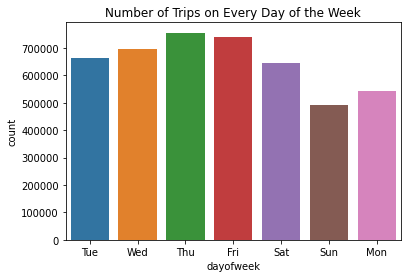

In [13]:
fig, ax = plt.subplots()
sns.countplot(data=uber_df, x = 'dayofweek')
ax.set(title = 'Number of Trips on Every Day of the Week')

In [12]:
month = uber_df['month']
month_df = month.value_counts()
month_df

Sep    1028136
Aug     829275
Jul     796121
Jun     663844
May     652435
Apr     564516
Name: month, dtype: int64

### Number of Trips Taking Place during Months in a Year

[Text(0.5, 1.0, 'Number of Trips During Months in a Year')]

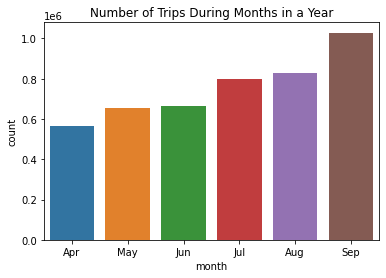

In [14]:
fig, ax = plt.subplots()
sns.countplot(data = uber_df, x = 'month')
ax.set(title = 'Number of Trips During Months in a Year')

In [23]:
week_month = uber_df[['month', 'dayofweek', 'Date.Time']]
week_month = week_month.groupby(['month', 'dayofweek']).agg('count')
week_month

Date.Time
month dayofweek           
Apr   Fri            90303
      Mon            60861
      Sat            77218
      Sun            51251
      Thu            85067
      Tue            91185
      Wed           108631
Aug   Fri           148674
      Mon            91633
      Sat           132225
      Sun           110246
      Thu           124117
      Tue           107124
      Wed           115256
Jul   Fri           102735
      Mon            93189
      Sat            90260
      Sun            76327
      Thu           148439
      Tue           137454
      Wed           147717
Jun   Fri           105056
      Mon            94655
      Sat            81364
      Sun            79656
      Thu           115325
      Tue            88134
      Wed            99654
May   Fri           133991
      Mon            63846
      Sat           102990
      Sun            56168
      Thu           128921
      Tue            76662
      Wed            89857
Sep   Fri           160380
      Mon           137288
      Sat           162057
      Sun           116532
      Thu           153276
      Tue           163230
      Wed           135373

### Number of Trips on Day of Week during Months

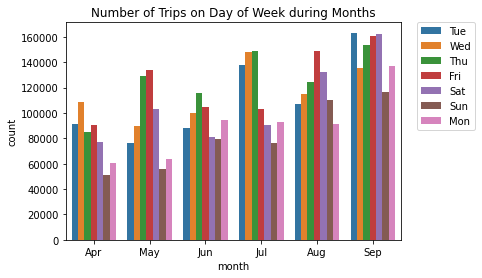

In [27]:
fig, ax = plt.subplots()
sns.countplot(x='month', data = uber_df, hue = 'dayofweek')
ax.set(title = 'Number of Trips on Day of Week during Months')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [24]:
week_month = week_month.pivot_table(index='month', columns='dayofweek', values='Date.Time')
week_month

dayofweek,Fri,Mon,Sat,Sun,Thu,Tue,Wed
month,,,,,,,
Apr,90303,60861,77218,51251,85067,91185,108631
Aug,148674,91633,132225,110246,124117,107124,115256
Jul,102735,93189,90260,76327,148439,137454,147717
Jun,105056,94655,81364,79656,115325,88134,99654
May,133991,63846,102990,56168,128921,76662,89857
Sep,160380,137288,162057,116532,153276,163230,135373


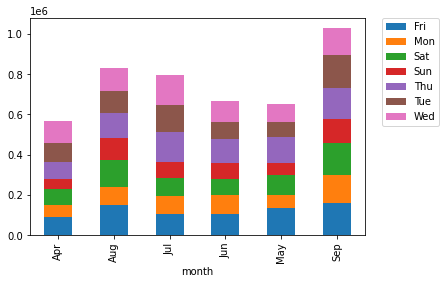

In [40]:
week_month.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Number of Trips on Day during Months

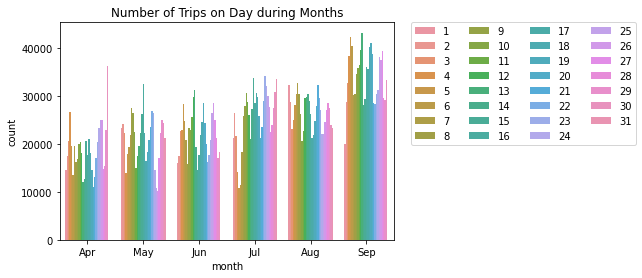

In [46]:
fig, ax = plt.subplots()
sns.countplot(x='month', data = uber_df, hue = 'day')
ax.set(title = 'Number of Trips on Day during Months')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=4)

In [42]:
day_mon = uber_df[['month', 'day', 'Date.Time']]
day_mon = day_mon.groupby(['month', 'day']).agg('count')
day_month = day_mon.pivot_table(index='day', columns='month', values='Date.Time')
mon_day = day_mon.pivot_table(index='month', columns='day', values='Date.Time')
mon_day

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
Apr,14546.0,17474.0,20701.0,26714.0,19521.0,13445.0,19550.0,16188.0,16843.0,20041.0,...,16975.0,20346.0,23352.0,25095.0,24925.0,14677.0,15475.0,22835.0,36251.0,NaN
Aug,32353.0,28678.0,23146.0,24952.0,28094.0,30495.0,32759.0,30411.0,26286.0,20584.0,...,29512.0,27097.0,22036.0,22093.0,24550.0,27018.0,28597.0,27424.0,23930.0,23271.0
Jul,21228.0,26480.0,21597.0,14148.0,10890.0,11443.0,18280.0,25763.0,27817.0,30541.0,...,29029.0,34073.0,32050.0,29975.0,27708.0,22590.0,23981.0,27589.0,30740.0,33541.0
Jun,15967.0,17503.0,22674.0,22831.0,28371.0,24683.0,20889.0,15749.0,23244.0,22874.0,...,16322.0,17735.0,20779.0,26460.0,28516.0,24895.0,21208.0,17107.0,18395.0,NaN
May,23375.0,24235.0,22234.0,13918.0,17859.0,19300.0,21891.0,27513.0,26385.0,22550.0,...,26802.0,26465.0,14651.0,10841.0,10202.0,17004.0,22240.0,24930.0,24413.0,21261.0
Sep,19961.0,28831.0,32631.0,38360.0,42319.0,40520.0,30134.0,30360.0,34560.0,35910.0,...,28312.0,30316.0,31301.0,38203.0,37504.0,39468.0,29656.0,29201.0,33431.0,NaN


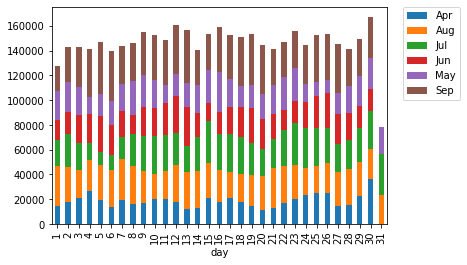

In [43]:
day_month.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Number of Trips in Hour during Months

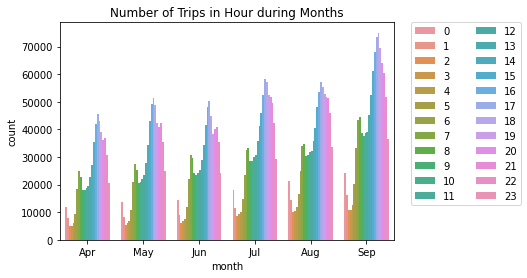

In [49]:
fig, ax = plt.subplots()
sns.countplot(x='month', data = uber_df, hue = 'hour')
ax.set(title = 'Number of Trips in Hour during Months')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2)

In [36]:
hour_mon = uber_df[['month', 'hour', 'Date.Time']]
hour_mon = hour_mon.groupby(['month', 'hour']).agg('count')
hour_month = hour_mon.pivot_table(index='hour', columns='month', values='Date.Time')
month_hour = hour_mon.pivot_table(index='month', columns='hour', values='Date.Time')
month_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
Apr,11910,7769,4935,5040,6095,9476,18498,24924,22843,17939,...,27190,35324,42003,45475,43003,38923,36244,36964,30645,20649
Aug,21451,14471,10105,10376,11774,16525,24907,34064,34566,30195,...,40644,48197,53481,57122,55390,53008,51674,51354,46008,33609
Jul,17953,11527,8562,9199,10040,14932,23456,32545,33387,28486,...,41357,46053,52403,58260,57268,52332,51859,49528,42218,29346
Jun,14514,9167,6189,6937,7701,11955,22030,30834,29771,24298,...,34428,41586,48162,50452,45013,38203,40108,40791,35614,24182
May,13875,8186,5372,5946,6945,10789,21015,27413,25460,20507,...,34363,43087,49127,51508,48965,42387,40731,42217,35556,24836
Sep,24133,16107,10702,10789,12675,20262,33307,43314,44477,38542,...,52643,61219,68224,73373,75040,69660,63988,60606,51817,36568


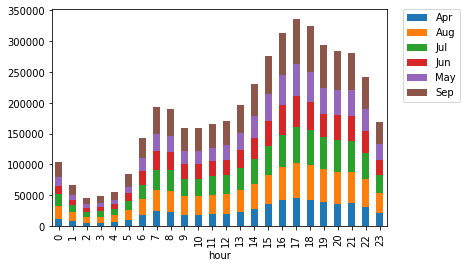

In [44]:
hour_month.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Heatmap Visualization of Hour, Day, Day of Week and Month

Heatmap by Hour and Day.

[Text(0.5, 1.0, 'Heatmap by Hour and Day')]

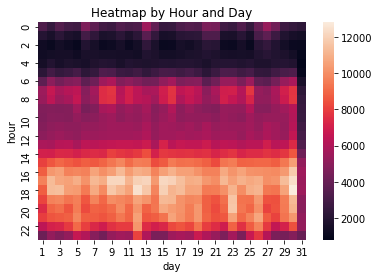

In [32]:
hour_day = uber_df[['day', 'hour', 'Date.Time']]
hour_day = hour_day.groupby(['day', 'hour']).agg('count')
hour_day = hour_day.pivot_table(index='hour', columns='day', values='Date.Time')

fig, ax = plt.subplots()
sns.heatmap(hour_day)
ax.set(title = 'Heatmap by Hour and Day')

Heatmap by Month and Day.

[Text(0.5, 1.0, 'Heatmap by Month and Day')]

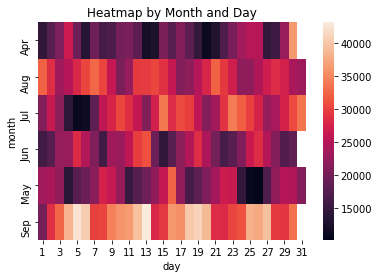

In [33]:
month_day = uber_df[['day', 'month', 'Date.Time']]
month_day = month_day.groupby(['day', 'month']).agg('count')
month_day = month_day.pivot_table(index='month', columns='day', values='Date.Time')

fig, ax = plt.subplots()
sns.heatmap(month_day)
ax.set(title = 'Heatmap by Month and Day')

Heatmap by Month and Day of the Week.

[Text(0.5, 1.0, 'Heatmap by Month and Day of the Week')]

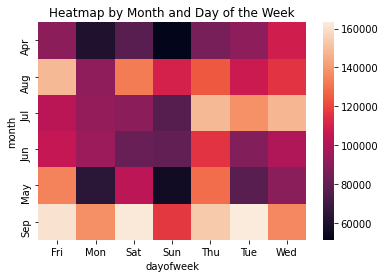

In [34]:
fig, ax = plt.subplots()
sns.heatmap(week_month)
ax.set(title = 'Heatmap by Month and Day of the Week')

Heatmap by Hour and Month.

[Text(0.5, 1.0, 'Heatmap by Hour and Month')]

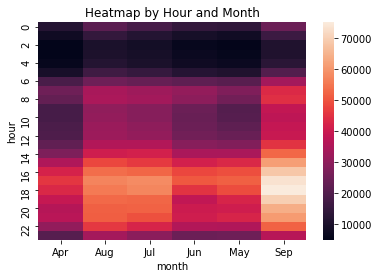

In [37]:
fig, ax = plt.subplots()
sns.heatmap(hour_month)
ax.set(title = 'Heatmap by Hour and Month')